# 🚢 Titanic Dataset – Easy & Insightful EDA
# 🔹 1. Basic Level – "Getting Familiar with the Data"
Goal: Get an overview of the dataset and identify missing values.

In [51]:
#Import Libraries & Load Data
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

df = pd.read_csv('Titanic-Dataset.csv')  


# Quick Data Exploration 

In [52]:
# ✅ Check first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Get column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
#finding unique values for each column 
# for col in df.columns:
#     print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in PassengerId: 891
Unique values in Survived: 2
Unique values in Pclass: 3
Unique values in Name: 891
Unique values in Sex: 2
Unique values in Age: 88
Unique values in SibSp: 7
Unique values in Parch: 7
Unique values in Ticket: 681
Unique values in Fare: 248
Unique values in Cabin: 147
Unique values in Embarked: 3


In [58]:
#count the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
# Descriptive statistics (numerical + categorical)
# df.describe()
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

# 🔹 2. Intermediate Level – "Cleaning & Finding Interesting Insights"
# Goal: Handle missing values and extract meaningful insights.

In [63]:
# ✅ Check missing data percentage
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [68]:
#Fill missing ages using median
#df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True) #1st approach
df["Age"].fillna(df["Age"].median(), inplace=True) #2nd approach

In [77]:
# Fill missing embarked values with the most frequent port
df.fillna(df.select_dtypes(include=["object"]).mode().iloc[0], inplace=True) #1st approach
# df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True) #2n approach

In [79]:
#Drop cabin column (too many missing values)
df.drop(["Cabin"], axis=1, inplace=True)

In [80]:
# Survival Rate by Gender
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [83]:
 #Survival Rate by Passenger Class
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [86]:
 #Did paying a higher fare increase survival chances?
print(df[["Fare", "Survived"]].groupby("Survived").mean())

               Fare
Survived           
0         22.117887
1         48.395408


In [88]:
#Did traveling alone impact survival?
df['Alone']=(df['SibSp'] + df['Parch'] == 0)
print(df.groupby('Alone')['Survived'].mean())

Alone
False    0.505650
True     0.303538
Name: Survived, dtype: float64


In [90]:
# Create an Age Group Column
df['AgeGroup']=pd.cut(df['Age'], bins=[0, 12, 19, 35, 60, 100], labels=["Child", "Teen", "Adult", "Middle-Aged", "Senior"])
print(df.groupby("AgeGroup")["Survived"].mean())

AgeGroup
Child          0.579710
Teen           0.410526
Adult          0.352941
Middle-Aged    0.400000
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\pavan\AppData\Local\Temp\ipykernel_21708\1249782243.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeGroup")["Survived"].mean())


In [91]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,Middle-Aged


In [93]:
#Create a Family Size Column
df['FamilySize']=df['SibSp']+df['Parch']+1
print(df.groupby('FamilySize')['Survived'].mean())

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


# 🔹 3. Advanced Level – "Visualizing the Data in an Engaging Way"
# Goal: Use charts to make insights visually clear.

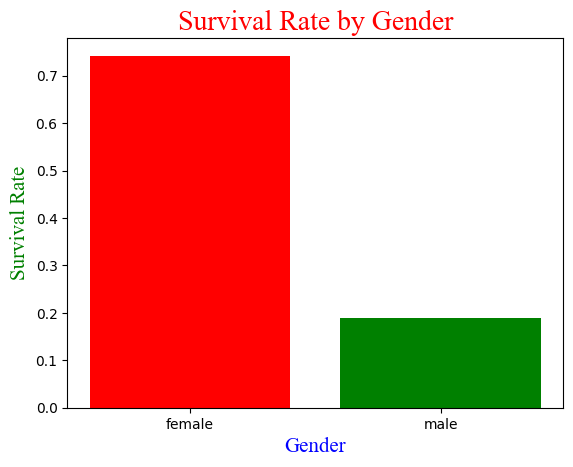

In [135]:
#Gender vs. Survival Rate (Bar Chart)
gender_survival=df.groupby('Sex')['Survived'].mean()
plt.bar(gender_survival.index, gender_survival.values, color=["Red","Green"])
font1 = {'family':'Times New Roman','color':'red','size':20}
font2 = {'family':'Times New Roman','color':'green','size':15}
font3 = {'family':'Times New Roman','color':'blue','size':15}
plt.xlabel("Gender", fontdict=font3)
plt.ylabel("Survival Rate", fontdict=font2)
plt.title("Survival Rate by Gender", fontdict=font1)
plt.show()

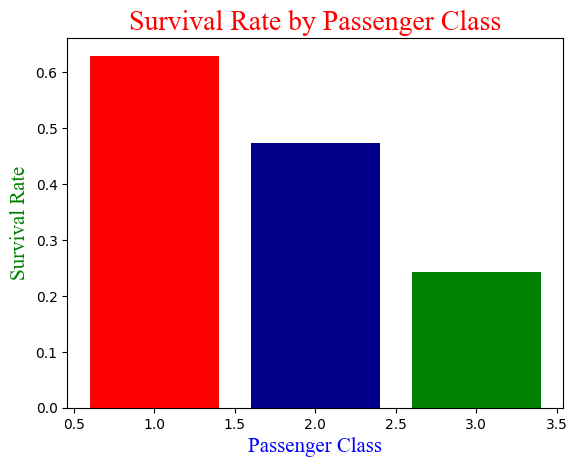

In [134]:
# Passenger Class vs. Survival Rate (Bar Chart)
passenger_survival=df.groupby('Pclass')['Survived'].mean()
plt.bar(passenger_survival.index, passenger_survival.values, color=["Red","DarkBlue","Green"])
font1 = {'family':'Times New Roman','color':'red','size':20}
font2 = {'family':'Times New Roman','color':'green','size':15}
font3 = {'family':'Times New Roman','color':'blue','size':15}
plt.xlabel("Passenger Class", fontdict=font3)
plt.ylabel("Survival Rate", fontdict=font2)
plt.title("Survival Rate by Passenger Class", fontdict=font1)
plt.show()

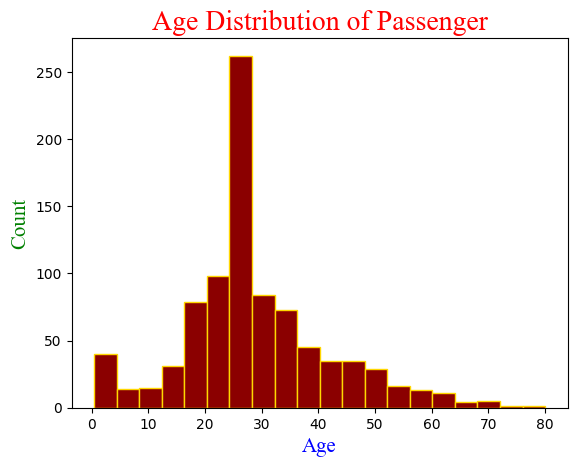

In [137]:
#Age Distribution (Histogram)
plt.hist(df['Age'].dropna(), bins=20, color='DarkRed', edgecolor='Gold')
font1 = {'family':'Times New Roman','color':'red','size':20}
font2 = {'family':'Times New Roman','color':'green','size':15}
font3 = {'family':'Times New Roman','color':'blue','size':15}
plt.xlabel('Age', fontdict=font3)
plt.ylabel('Count', fontdict=font2)
plt.title('Age Distribution of Passenger', fontdict=font1)
plt.show()

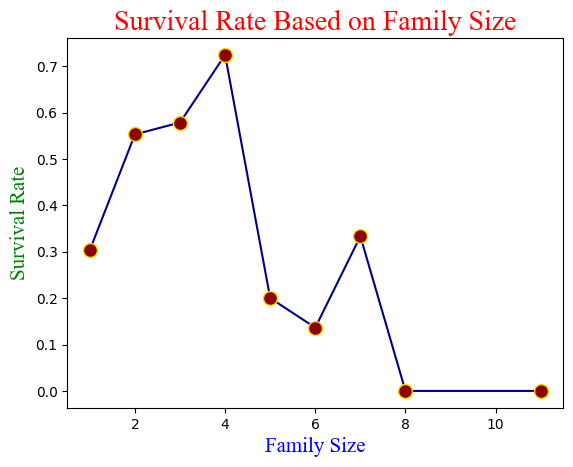

In [127]:
#Family Size vs. Survival Rate (Line Plot)
family_survival=df.groupby('FamilySize')['Survived'].mean()
plt.plot(family_survival.index, family_survival.values,marker = 'o', c = 'darkblue', ms = 10, mec = 'gold', mfc = 'darkred', linestyle='-')
font1 = {'family':'Times New Roman','color':'red','size':20}
font2 = {'family':'Times New Roman','color':'green','size':15}
font3 = {'family':'Times New Roman','color':'blue','size':15}
plt.xlabel("Family Size", fontdict=font3)
plt.ylabel("Survival Rate", fontdict=font2)
plt.title("Survival Rate Based on Family Size", fontdict=font1)
plt.show()

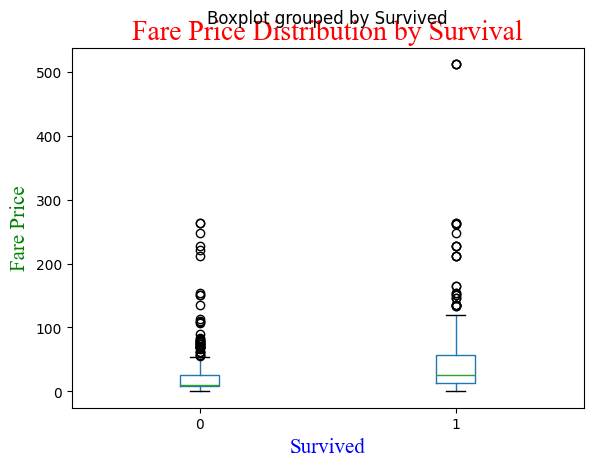

In [138]:
#Fare Price vs. Survival (Box Plot)
df.boxplot(column='Fare', by='Survived', grid=False)
font1 = {'family':'Times New Roman','color':'red','size':20}
font2 = {'family':'Times New Roman','color':'green','size':15}
font3 = {'family':'Times New Roman','color':'blue','size':15}
plt.xlabel('Survived', fontdict=font3)
plt.ylabel('Fare Price', fontdict=font2)
plt.title('Fare Price Distribution by Survival', fontdict=font1)
plt.show()


# 🔹 Key Takeaways
✅ Basic Level (Understanding the Data)
✔️ Load dataset & check missing values
✔️ Identify unique values & column types
✔️ Compute basic statistics

✅ Intermediate Level (Cleaning & New Insights)
✔️ Handle missing values effectively
✔️ Check survival based on gender, class, fare, and family size
✔️ Create new features like Age Groups & Titles

✅ Advanced Level (Visualizing the Insights)
✔️ Bar charts for gender, class & embarkation survival rates
✔️ Histograms & Boxplots for age & fare distributions
✔️ Line plots for family size survival analysis

